The images are the same


(-0.5, 265.5, 265.5, -0.5)

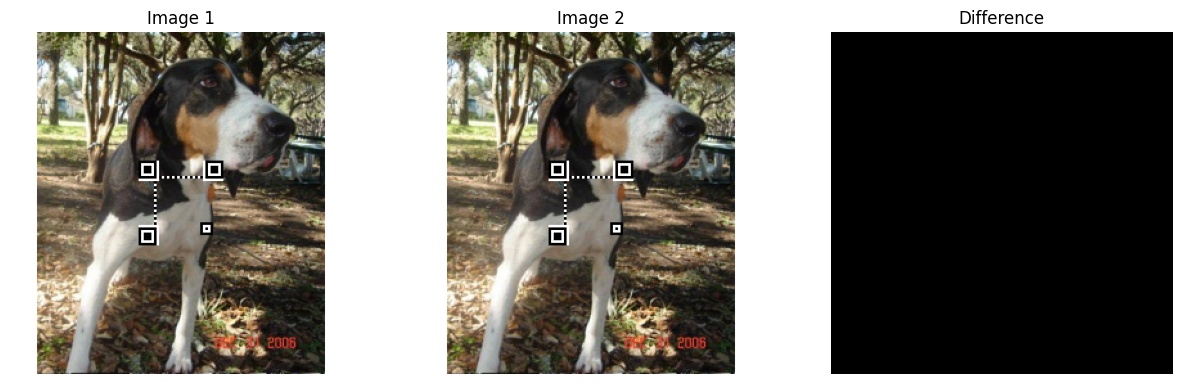

In [12]:

from PIL import Image
from PIL.Image import Resampling
import random
import string
import segno
from segno import consts
import numpy as np
import cv2
import matplotlib.pyplot as plt
# all resamplings:
# PIL.Image.NEAREST: nearest pixel, ignore all other            # absolutely lossy
# PIL.Image.BOX: all pixels are averaged                        # not lossy (see outline)
# PIL.Image.BILINEAR                                            # not lossy (see outline)        
# PIL.Image.HAMMING                                             # not lossy (see outline)  
# PIL.Image.BICUBIC                                             # not lossy (see outline)
# PIL.Image.LANCZOS                                             # not lossy (see outline)        
downscaling_type = Resampling.NEAREST
DOWNSCALE_FACTOR = 6
original_image_1 = Image.open("v1.png")
new_size = (original_image_1.size[0] // DOWNSCALE_FACTOR,
                    original_image_1.size[1] // DOWNSCALE_FACTOR)
small_image_1 = original_image_1.resize(new_size, downscaling_type )
original_image_2 = Image.open("v2.png")
new_size = (original_image_2.size[0] // DOWNSCALE_FACTOR,
                    original_image_2.size[1] // DOWNSCALE_FACTOR)
small_image_2 = original_image_2.resize(new_size, downscaling_type )

cv2_im1 = small_image_1.convert('RGB')
cv2_im1 = np.array(cv2_im1)
cv2_im2 = small_image_2.convert('RGB')
cv2_im2 = np.array(cv2_im2)

diff = cv2.subtract(cv2_im1, cv2_im2)
result = not np.any(diff)
if result:
    print("The images are the same")
else:
    cv2.imwrite('diff.png', diff)
    print("The images are different")


# small_image_1.show()
# small_image_2.show()

plot, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2_im1)
axs[0].set_title('Image 1')
axs[1].imshow(cv2_im2)
axs[1].set_title('Image 2')
axs[2].imshow(diff)
axs[2].set_title('Difference')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')


